In [0]:
#Linear Algebra
import numpy as np
#Data preprocessing
import pandas as pd
#setting display options
pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 80)
pd.set_option('max_colwidth', 300)
np.set_printoptions(linewidth =400)
#Catboost Classifier Algorithm
#from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import classification_report
#Matlab-style plotting
from matplotlib import pyplot as plt
%matplotlib inline
#Advance-style plotting
import seaborn as sns
color =sns.color_palette()
sns.set_style('darkgrid')
#Ignore annoying warning from sklearn and seaborn
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [2]:
!pip install catboost

In [0]:
import pandas as pd
import numpy as np
import os, random, math, glob
from IPython.display import Image as IM
from IPython.display import clear_output
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 10]

In [0]:
from catboost import CatBoostClassifier

In [0]:
from google.colab import files

In [6]:
#upload womxn_Test, Womxn_Train, womnx-variable_description.csv and sample.csv 
uploaded = files.upload()

In [7]:
Wonx_Sample = pd.read_csv("Womnx_SampleSubmission.csv")
Wonx_Sample.head()

,ward,target
0,21001001: Ward 1,21.87
1,21001002: Ward 2,65.94
2,21001003: Ward 3,83.65
3,21001004: Ward 4,NaN
4,21001005: Ward 5,NaN


In [8]:
Wonx_train = pd.read_csv("Womxn_Train.csv")
Wonx_train.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,0.008080,0.002823,0.001431,0.008224,0,0,0.260191,0.607898,0.000188,0.010018,0.121705,0.283468,0.716532,0.273727,0.726273,0.118825,0.881175,0.832913,0.012336,0.001923,0.050939,0.000000,0.000564,0.076088,0.006371,0.003663,0.000375,0.000372,0.004943,0.002719,0,0.006793,0.357455,0.563166,0.004260,0.072996,0.002123,0.919424,0.742692,0.214027,0.019968,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,0.151910,0.001486,0.001253,0.008010,0,0,0.290228,0.549788,0.000000,0.021336,0.138647,0.103641,0.896359,0.144638,0.855362,0.066903,0.933097,0.879655,0.008445,0.000328,0.011249,0.000842,0.001759,0.032431,0.030844,0.001646,0.001308,0.000994,0.000000,0.002439,0,0.028061,0.698428,0.278006,0.003695,0.015835,0.004036,0.959259,0.309294,0.576844,0.018946,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,0.129902,0.000000,0.000000,0.004150,0,0,0.186435,0.677005,0.000489,0.021315,0.114757,0.165772,0.834228,0.272220,0.727780,0.100009,0.899991,0.565546,0.015991,0.001566,0.111270,0.004795,0.002552,0.148083,0.139687,0.003165,0.000165,0.000779,0.001692,0.002509,0,0.002200,0.672452,0.154225,0.002181,0.167494,0.003649,0.826164,0.323393,0.483376,0.083010,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,0.218786,0.000000,0.000000,0.002947,0,0,0.281229,0.593281,0.000579,0.007249,0.117663,0.087768,0.912232,0.127875,0.872125,0.029155,0.970845,0.743812,0.006530,0.001188,0.086423,0.006735,0.002308,0.103244,0.038284,0.003080,0.000582,0.000000,0.000197,0.007442,0,0.000174,0.728014,0.263831,0.001806,0.000956,0.005393,0.986151,0.677437,0.314194,0.002689,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,0.015382,0.008693,0.000000,0.000673,0,0,0.196687,0.517578,0.000989,0.005148,0.279598,0.345975,0.654025,0.404507,0.595493,0.133552,0.866448,0.422623,0.014352,0.000842,0.121869,0.007027,0.002613,0.147363,0.081706,0.003044,0.000169,0.000643,0.001201,0.004276,0,0.192272,0.753491,0.129654,0.004523,0.106953,0.005380,0.957376,0.771106,0.194743,0.009699,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000


In [9]:
Wonx_test = pd.read_csv("womxn_Test.csv")
Wonx_test.head()

,ward,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,21001001: Ward 1,2504.95194,8745.15151,0.947257,0.000873,0.002021,0.000000,0.000000,0.030116,0.000452,0.013018,0.003516,0.000000,0.000668,0.002078,0.0,0.0,0.246694,0.615326,0.000000,0.016724,0.121257,0.155406,0.844594,0.216589,0.783411,0.173569,0.826431,0.817552,0.022885,0.000643,0.125655,0.000400,0.000125,0.002761,0.006069,0.000384,0.000131,0.000259,0.0,0.004612,0.0,0.018525,0.173136,0.736099,0.003712,0.083467,0.003586,0.921001,0.551691,0.427445,0.012457,0.001757,0.000000,0.0,0.006649,0.0,0.0,ZA2101001,-32.637758,23.848688,0.000000
1,21001002: Ward 2,2080.27718,7258.11764,0.844993,0.000481,0.043629,0.004714,0.012323,0.012300,0.022132,0.022412,0.016969,0.006702,0.006492,0.006853,0.0,0.0,0.193484,0.532209,0.000936,0.052571,0.220800,0.406129,0.593871,0.498555,0.501445,0.366732,0.633268,0.434771,0.106254,0.000439,0.289230,0.001222,0.001483,0.002284,0.003142,0.001063,0.000162,0.000000,0.0,0.005779,0.0,0.154172,0.471349,0.191902,0.002854,0.324584,0.009311,0.955494,0.759594,0.227192,0.009606,0.000691,0.000000,0.0,0.002916,0.0,0.0,ZA2101002,-31.990536,24.555818,0.000000
2,21001003: Ward 3,1106.62639,5919.13170,0.651380,0.007937,0.007113,0.000000,0.001977,0.259711,0.006505,0.044153,0.013530,0.000000,0.000000,0.007695,0.0,0.0,0.295614,0.499440,0.011465,0.078808,0.114673,0.237233,0.762767,0.190044,0.809956,0.090176,0.909824,0.953113,0.015398,0.000380,0.017653,0.000766,0.000190,0.002090,0.001140,0.003230,0.002241,0.000755,0.0,0.003043,0.0,0.000000,0.079592,0.914919,0.001520,0.000549,0.003420,0.975955,0.704033,0.291719,0.001996,0.002253,0.000000,0.0,0.000000,0.0,0.0,ZA2101003,-32.283595,24.563940,8.269556
3,21001004: Ward 4,2175.56096,10280.57452,0.410837,0.002468,0.011511,0.000485,0.000000,0.449604,0.009256,0.101963,0.001516,0.009203,0.000000,0.003157,0.0,0.0,0.265445,0.519198,0.000000,0.014156,0.201201,0.343086,0.656914,0.348310,0.651690,0.248744,0.751256,0.852038,0.020889,0.000985,0.018133,0.000219,0.000552,0.000865,0.005020,0.000766,0.000000,0.000109,0.0,0.001208,0.0,0.099216,0.102274,0.832795,0.006965,0.054769,0.003197,0.965817,0.556172,0.439729,0.002060,0.000000,0.000661,0.0,0.001379,0.0,0.0,ZA2101004,-32.261612,24.542202,8.626625
4,21001005: Ward 5,1270.83883,6018.34202,0.942851,0.002638,0.000821,0.000000,0.000891,0.000787,0.000830,0.027930,0.001617,0.017343,0.000000,0.004291,0.0,0.0,0.285008,0.552023,0.000187,0.053495,0.109287,0.255566,0.744434,0.182219,0.817781,0.137765,0.862235,0.965567,0.011856,0.000374,0.010614,0.001126,0.000000,0.001869,0.004672,0.000747,0.000000,0.000747,0.0,0.002429,0.0,0.000000,0.033536,0.956602,0.007059,0.000000,0.002803,0.951707,0.444380,0.553173,0.000787,0.000000,0.000000,0.0,0.001660,0.0,0.0,ZA2101005,-32.251571,24.558537,8.601754


In [10]:
var_desc = pd.read_csv("Womnx-variable_descriptions.csv")
pd.set_option('display.max_colwidth', 200) # So that we can see the full descriptions
var_desc

,Column,Description,Unnamed: 2,Unnamed: 3
0,dw_00,Percentage of dwellings of type: House or brick/concrete block structure on a separate stand or yard or on a farm,NaN,NaN
1,dw_01,Percentage of dwellings of type: Traditional dwelling/hut/structure made of traditional materials,NaN,NaN
2,dw_02,Percentage of dwellings of type: Flat or apartment in a block of flats,NaN,NaN
3,dw_03,Percentage of dwellings of type: Cluster house in complex,NaN,NaN
4,dw_04,Percentage of dwellings of type: Townhouse (semi-detached house in a complex),NaN,NaN
5,dw_05,Percentage of dwellings of type: Semi-detached house,NaN,NaN
6,dw_06,Percentage of dwellings of type: House/flat/room in backyard,NaN,NaN
7,dw_07,Percentage of dwellings of type: Informal dwelling (shack,in backyard),NaN
8,dw_08,Percentage of dwellings of type: Informal dwelling (shack,not in backyard,e.g. in an informal/squatter settlement or on a farm)
9,dw_09,Percentage of dwellings of type: Room/flatlet on a property or larger dwelling/servants quarters/granny flat,NaN,NaN


In [11]:
Wonx_test.shape

(1013, 62)

In [12]:
Wonx_train.shape

(2822, 63)

Text(0.5, 0, 'Percentage of households that are w-headed and have income under R19.6k/month')

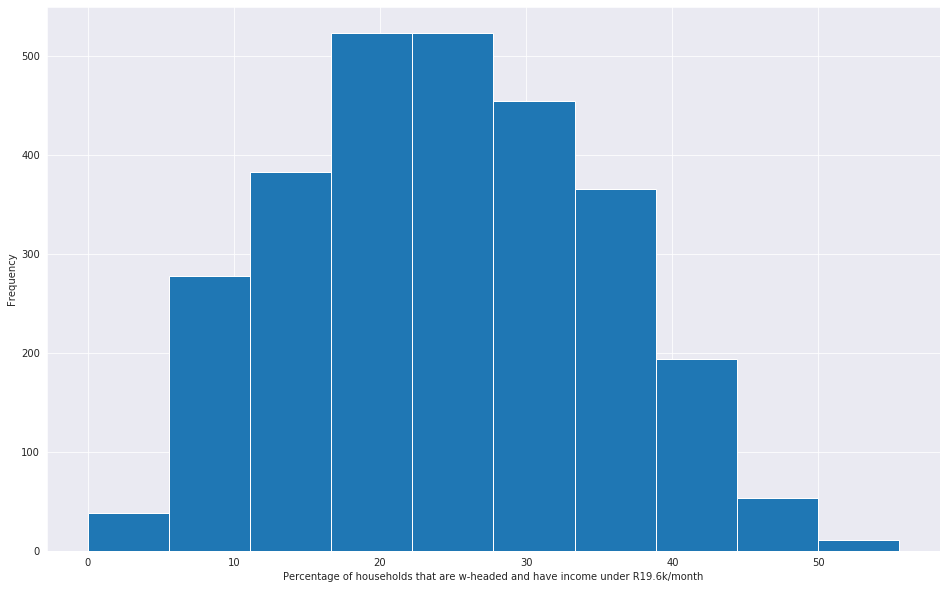

In [13]:
# Plot the distribution
ax = Wonx_train['target'].plot(kind='hist')
plt.xlabel('Percentage of households that are w-headed and have income under R19.6k/month')

In [14]:
Wonx_train.corr()

,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,lat,lon,NL
total_households,1.000000,0.959244,-0.374833,-0.226119,-0.231304,0.222825,0.328743,0.314811,0.095374,0.284317,0.267116,0.240964,0.128285,-0.057963,-0.001159,NaN,NaN,-0.348228,0.304959,0.106763,0.321778,-0.189969,0.250416,-0.250416,0.253040,-0.253040,0.292774,-0.292774,-0.034003,0.384818,-0.019893,0.104534,-0.064717,-0.028589,-0.032726,-0.100976,-0.045081,-0.041664,0.048105,0.045326,0.373283,NaN,0.018370,-0.151855,-0.083354,0.221372,0.183153,0.108861,0.093197,0.337449,-0.097993,-0.140827,-0.149199,-0.121961,-0.110339,-0.228412,NaN,NaN,0.063018,0.032249,0.708701
total_individuals,0.959244,1.000000,-0.293827,-0.200350,-0.161183,0.178921,0.255194,0.245253,0.109852,0.252280,0.205278,0.186950,0.080483,-0.078160,-0.002963,NaN,NaN,-0.242333,0.187257,0.103006,0.353433,-0.157760,0.206140,-0.206140,0.200226,-0.200226,0.251397,-0.251397,-0.082232,0.340476,-0.015302,0.057173,0.027323,-0.031766,-0.067826,-0.131588,-0.053589,-0.034436,0.065083,0.053421,0.296255,NaN,-0.007718,-0.092933,-0.093178,0.229503,0.103576,0.077212,0.075161,0.288838,-0.094539,-0.127982,-0.135562,-0.103966,-0.084651,-0.174518,NaN,NaN,0.039653,0.104198,0.684853
target,-0.374833,-0.293827,1.000000,0.018461,0.458206,-0.232727,-0.338137,-0.385533,-0.146357,-0.248573,-0.177763,-0.186627,-0.235331,-0.128540,-0.109490,NaN,NaN,0.782472,-0.707506,-0.097613,-0.301572,0.203999,-0.664181,0.664181,-0.702831,0.702831,-0.637835,0.637835,-0.507942,-0.438704,-0.020163,-0.142685,0.232266,0.275263,-0.038563,-0.046968,-0.003930,0.066230,0.106548,0.210597,-0.325367,NaN,-0.287004,0.613346,-0.232792,-0.224005,-0.583908,-0.213812,-0.260286,-0.754536,0.113646,0.442441,0.440941,0.389467,0.349653,0.470676,NaN,NaN,0.120381,0.347088,-0.514398
dw_00,-0.226119,-0.200350,0.018461,1.000000,-0.614702,-0.356335,-0.154956,-0.126421,-0.076181,-0.181262,-0.228804,-0.364130,-0.076239,-0.025813,-0.119659,NaN,NaN,0.053266,0.061978,-0.100414,-0.215588,-0.116875,0.204563,-0.204563,0.103555,-0.103555,0.016995,-0.016995,0.080893,-0.112058,0.079717,-0.133999,-0.432648,0.284967,0.083131,0.100746,-0.061157,0.099285,0.111999,0.147429,-0.175611,NaN,-0.059788,-0.013708,0.070832,-0.062480,-0.007774,-0.046675,0.526407,0.098374,0.180496,-0.064290,-0.079610,-0.059986,-0.038534,-0.297510,NaN,NaN,0.348089,-0.152692,-0.133895
dw_01,-0.231304,-0.161183,0.458206,-0.614702,1.000000,0.000617,-0.075112,-0.112250,-0.095776,-0.099431,-0.236245,-0.223481,-0.102495,-0.009229,-0.016891,NaN,NaN,0.469828,-0.522799,0.036300,0.052726,0.199668,-0.389343,0.389343,-0.304002,0.304002,-0.243632,0.243632,-0.202522,-0.158659,-0.069958,-0.047451,0.610104,-0.167927,-0.184446,-0.161752,0.004287,-0.033338,-0.041126,-0.061126,-0.191934,NaN,-0.109161,0.229224,-0.121589,-0.094507,-0.182425,-0.107281,-0.600681,-0.407428,-0.203044,0.222130,0.250931,0.202204,0.211378,0.600377,NaN,NaN,-0.346198,0.349469,-0.338058
dw_02,0.222825,0.178921,-0.232727,-0.356335,0.000617,1.000000,0.199940,0.205096,0.015692,0.086548,-0.138369,-0.102479,0.104707,0.016612,-0.016776,NaN,NaN,-0.111500,0.022469,0.101216,0.221837,0.037600,0.232527,-0.232527,0.263602,-0.263602,0.294071,-0.294071,0.093623,0.347070,-0.024555,0.022487,0.080942,-0.119165,-0.104374,-0.119998,-0.062700,-0.047990,-0.037483,-0.084470,0.394650,NaN,0.224816,-0.240298,0.019088,0.205087,0.233521,0.112925,0.035062,0.341398,-0.266980,-0.135700,-0.128604,-0.096198,-0.061072,-0.040765,NaN,NaN,-0.126910,0.075945,0.304287
dw_03,0.328743,0.255194,-0.338137,-0.154956,-0.075112,0.199940,1.000000,0.724167,0.026997,0.030068,-0.101747,-0.073226,0.088665,0.003593,-0.004090,NaN,NaN,-0.198897,0.179108,0.090417,0.214318,-0.140442

In [15]:
# Strong +ve correlations
Wonx_train.corr()['target'].sort_values(ascending=False).head(10)

target    1.000000
psa_00    0.782472
car_01    0.702831
stv_01    0.664181
lln_01    0.637835
pg_00     0.613346
pw_06     0.470676
dw_01     0.458206
pw_02     0.442441
pw_03     0.440941
Name: target, dtype: float64

In [16]:
# Strong -ve correlations
Wonx_train.corr()['target'].sort_values().head(10)

pw_00    -0.754536
psa_01   -0.707506
car_00   -0.702831
stv_00   -0.664181
lln_00   -0.637835
pg_03    -0.583908
NL       -0.514398
lan_00   -0.507942
lan_01   -0.438704
dw_04    -0.385533
Name: target, dtype: float64

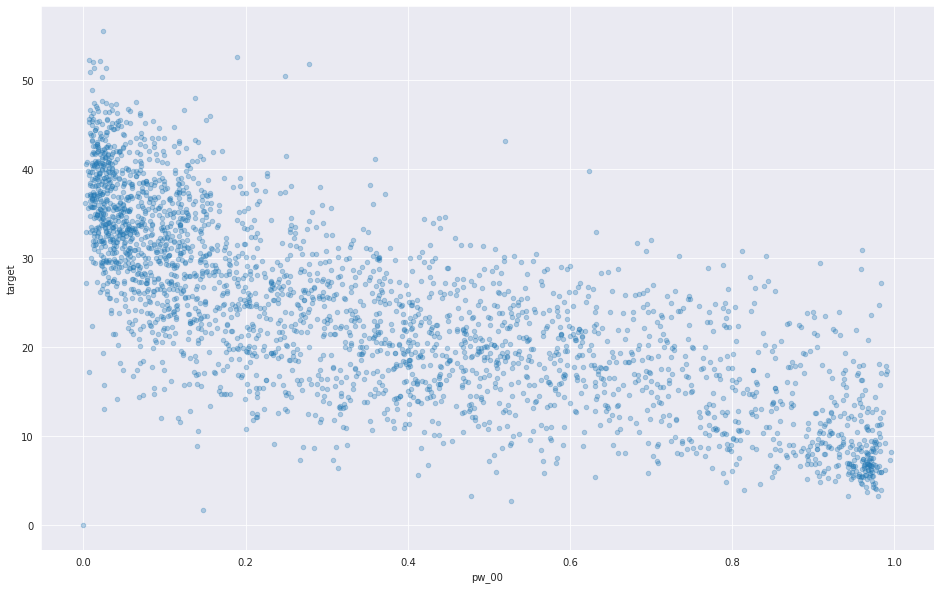

In [17]:
# pw_00: running water in the home. Places where almost everyone has piped water tend to be more affluent.
Wonx_train.plot(x='pw_00', y='target', kind='scatter', alpha=0.3)

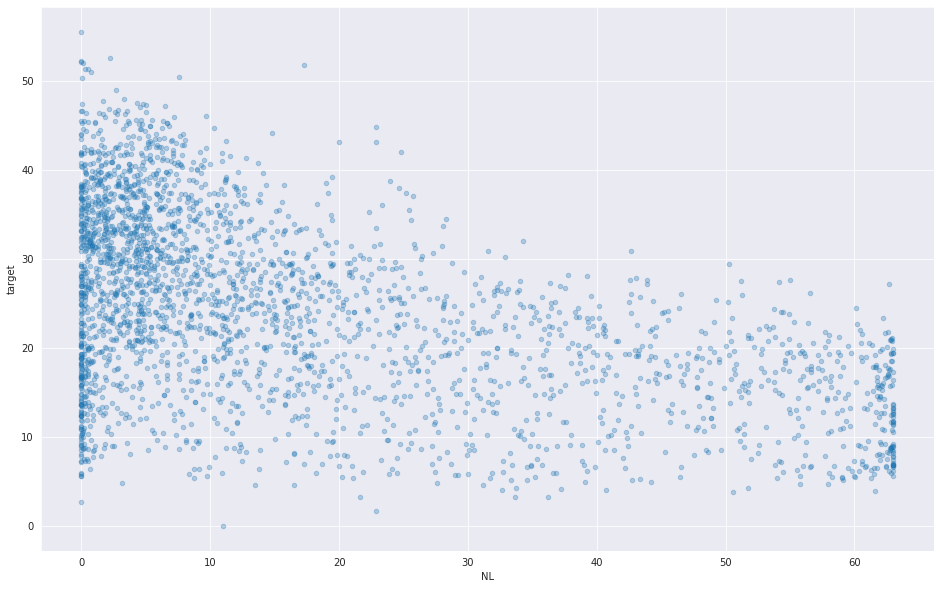

In [18]:
# pw_00: running water in the home. Places where almost everyone has piped water tend to be more affluent.
Wonx_train.plot(x='NL', y='target', kind='scatter', alpha=0.3)

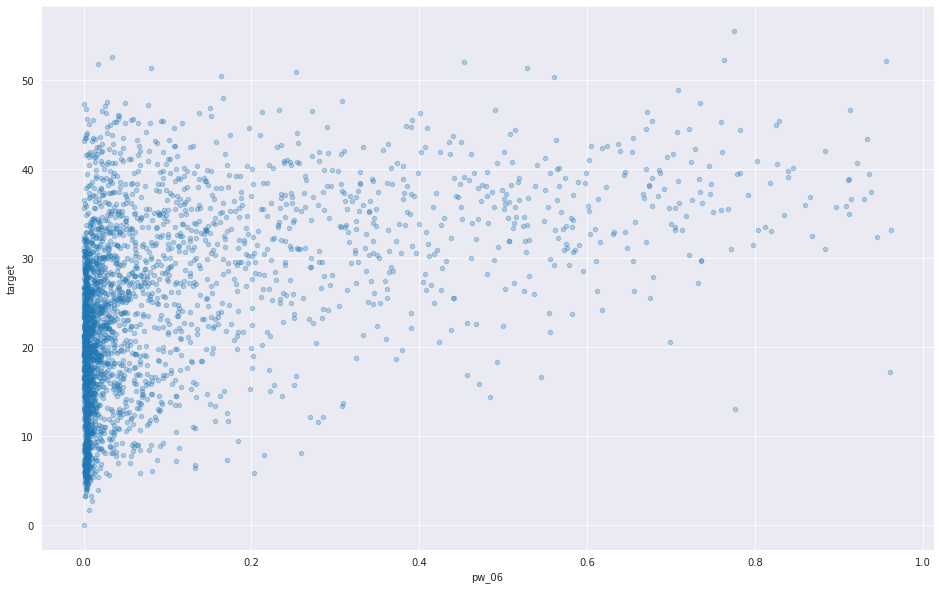

In [19]:
# pw_00: running water in the home. Places where almost everyone has piped water tend to be more affluent.
Wonx_train.plot(x='pw_06', y='target', kind='scatter', alpha=0.3)

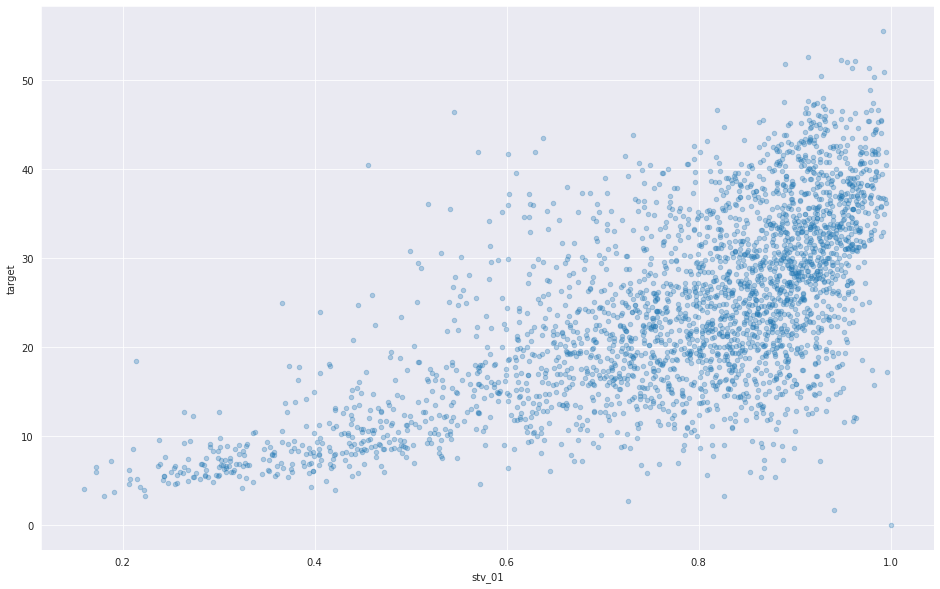

In [20]:
# pw_00: running water in the home. Places where almost everyone has piped water tend to be more affluent.
Wonx_train.plot(x='stv_01', y='target', kind='scatter', alpha=0.3)

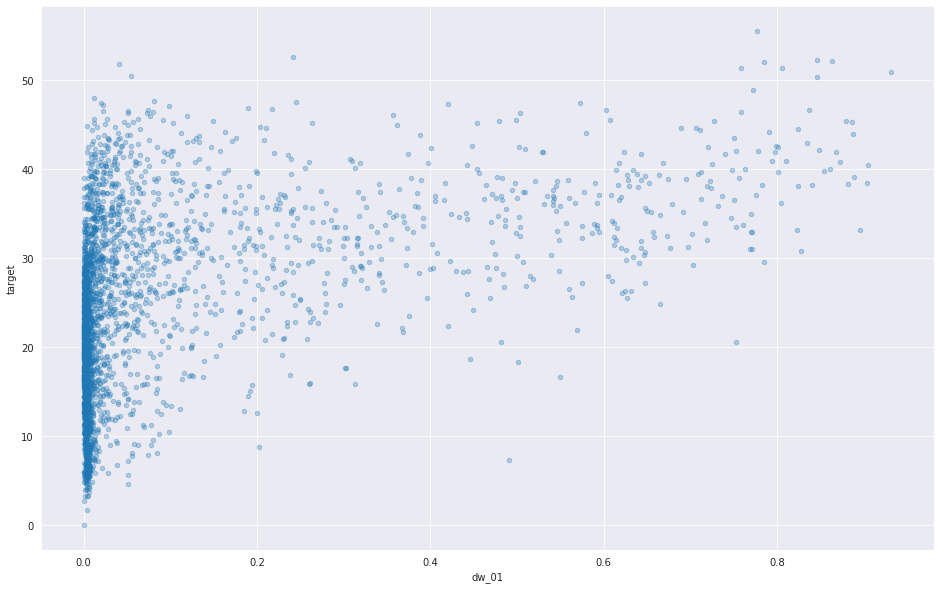

In [21]:
# dw_01: Percentage of dwellings of type: Traditional dwelling/hut/structure made of traditional materials
# Places where many of the buildings are 'traditional' tend to have more households 
# in the target category. 
Wonx_train.plot(x='dw_01', y='target', kind='scatter', alpha=0.3)

In [0]:
# dw_01: Percentage of dwellings of type: Traditional dwelling/hut/structure made of traditional materials
# Places where many of the buildings are 'traditional' tend to have more households 
# in the target category. 
#Wonx_train.plot(x='ADM4_PCODE', y='target', kind='scatter', alpha=0.3)

In [0]:
len_train= len(Wonx_train)
new_df = pd.concat([Wonx_train, Wonx_test])

In [24]:
new_df.isnull().sum()

ADM4_PCODE              0
NL                      0
car_00                  0
car_01                  0
dw_00                   0
dw_01                   0
dw_02                   0
dw_03                   0
dw_04                   0
dw_05                   0
dw_06                   0
dw_07                   0
dw_08                   0
dw_09                   0
dw_10                   0
dw_11                   0
dw_12                   0
dw_13                   0
lan_00                  0
lan_01                  0
lan_02                  0
lan_03                  0
lan_04                  0
lan_05                  0
lan_06                  0
lan_07                  0
lan_08                  0
lan_09                  0
lan_10                  0
lan_11                  0
lan_12                  0
lan_13                  0
lan_14                  0
lat                     0
lgt_00                  0
lln_00                  0
lln_01                  0
lon                     0
pg_00       

In [25]:
numeric_features = new_df.select_dtypes(include=[np.number])
numeric_features.dtypes

NL                   float64
car_00               float64
car_01               float64
dw_00                float64
dw_01                float64
dw_02                float64
dw_03                float64
dw_04                float64
dw_05                float64
dw_06                float64
dw_07                float64
dw_08                float64
dw_09                float64
dw_10                float64
dw_11                float64
dw_12                float64
dw_13                float64
lan_00               float64
lan_01               float64
lan_02               float64
lan_03               float64
lan_04               float64
lan_05               float64
lan_06               float64
lan_07               float64
lan_08               float64
lan_09               float64
lan_10               float64
lan_11               float64
lan_12               float64
lan_13               float64
lan_14               float64
lat                  float64
lgt_00               float64
lln_00        

In [26]:
numeric_features = new_df.select_dtypes(exclude=[np.number])
numeric_features.dtypes

ADM4_PCODE    object
ward          object
dtype: object

In [27]:
new_df.head()

,ADM4_PCODE,NL,car_00,car_01,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,lat,lgt_00,lln_00,lln_01,lon,pg_00,pg_01,pg_02,pg_03,pg_04,psa_00,psa_01,psa_02,psa_03,psa_04,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,stv_00,stv_01,target,total_households,total_individuals,ward
0,ZA4161001,0.292039,0.273727,0.726273,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,0.008080,0.002823,0.001431,0.008224,0.0,0.0,0.832913,0.012336,0.001923,0.050939,0.000000,0.000564,0.076088,0.006371,0.003663,0.000375,0.000372,0.004943,0.002719,0.0,0.006793,-29.682270,0.919424,0.118825,0.881175,24.734743,0.357455,0.563166,0.004260,0.072996,0.002123,0.260191,0.607898,0.000188,0.010018,0.121705,0.742692,0.214027,0.019968,0.002848,0.007537,0.000000,0.012928,0.0,0.0,0.283468,0.716532,16.773757,1674.45058,5888.20750,41601001: Ward 1
1,ZA4161002,3.207775,0.144638,0.855362,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,0.151910,0.001486,0.001253,0.008010,0.0,0.0,0.879655,0.008445,0.000328,0.011249,0.000842,0.001759,0.032431,0.030844,0.001646,0.001308,0.000994,0.000000,0.002439,0.0,0.028061,-29.119311,0.959259,0.066903,0.933097,24.757737,0.698428,0.278006,0.003695,0.015835,0.004036,0.290228,0.549788,0.000000,0.021336,0.138647,0.309294,0.576844,0.018946,0.014566,0.057127,0.019092,0.004131,0.0,0.0,0.103641,0.896359,21.496661,1736.99230,6735.33812,41601002: Ward 2
2,ZA4161003,0.000000,0.272220,0.727780,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,0.129902,0.000000,0.000000,0.004150,0.0,0.0,0.565546,0.015991,0.001566,0.111270,0.004795,0.002552,0.148083,0.139687,0.003165,0.000165,0.000779,0.001692,0.002509,0.0,0.002200,-29.142276,0.826164,0.100009,0.899991,25.094093,0.672452,0.154225,0.002181,0.167494,0.003649,0.186435,0.677005,0.000489,0.021315,0.114757,0.323393,0.483376,0.083010,0.057560,0.010358,0.001421,0.040881,0.0,0.0,0.165772,0.834228,10.931425,2403.57591,7273.04995,41601003: Ward 3
3,ZA4161004,2.038778,0.127875,0.872125,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,0.218786,0.000000,0.000000,0.002947,0.0,0.0,0.743812,0.006530,0.001188,0.086423,0.006735,0.002308,0.103244,0.038284,0.003080,0.000582,0.000000,0.000197,0.007442,0.0,0.000174,-29.372052,0.986151,0.029155,0.970845,24.942867,0.728014,0.263831,0.001806,0.000956,0.005393,0.281229,0.593281,0.000579,0.007249,0.117663,0.677437,0.314194,0.002689,0.000000,0.000669,0.000000,0.005011,0.0,0.0,0.087768,0.912232,23.119257,1740.78737,5734.49046,41601004: Ward 4
4,ZA4161005,0.000000,0.404507,0.595493,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,0.015382,0.008693,0.000000,0.000673,0.0,0.0,0.422623,0.014352,0.000842,0.121869,0.007027,0.002613,0.147363,0.081706,0.003044,0.000169,0.000643,0.001201,0.004276,0.0,0.192272,-29.409381,0.957376,0.133552,0.866448,25.290165,0.753491,0.129654,0.004523,0.106953,0.005380,0.196687,0.517578,0.000989,0.005148,0.279598,0.771106,0.194743,0.009699,0.004859,0.001290,0.000673,0.017629,0.0,0.0,0.345975,0.654025,13.652252,1730.51451,6657.23835,41601005: Ward 5


In [0]:
# Define our input columns.
#in_col = new_df.drop('ADM4_PCODE').columns[4:]
#in_col

In [0]:
new_df = new_df.drop('ADM4_PCODE', axis=1)

In [30]:
new_df.head()

,NL,car_00,car_01,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,lat,lgt_00,lln_00,lln_01,lon,pg_00,pg_01,pg_02,pg_03,pg_04,psa_00,psa_01,psa_02,psa_03,psa_04,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,stv_00,stv_01,target,total_households,total_individuals,ward
0,0.292039,0.273727,0.726273,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,0.008080,0.002823,0.001431,0.008224,0.0,0.0,0.832913,0.012336,0.001923,0.050939,0.000000,0.000564,0.076088,0.006371,0.003663,0.000375,0.000372,0.004943,0.002719,0.0,0.006793,-29.682270,0.919424,0.118825,0.881175,24.734743,0.357455,0.563166,0.004260,0.072996,0.002123,0.260191,0.607898,0.000188,0.010018,0.121705,0.742692,0.214027,0.019968,0.002848,0.007537,0.000000,0.012928,0.0,0.0,0.283468,0.716532,16.773757,1674.45058,5888.20750,41601001: Ward 1
1,3.207775,0.144638,0.855362,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,0.151910,0.001486,0.001253,0.008010,0.0,0.0,0.879655,0.008445,0.000328,0.011249,0.000842,0.001759,0.032431,0.030844,0.001646,0.001308,0.000994,0.000000,0.002439,0.0,0.028061,-29.119311,0.959259,0.066903,0.933097,24.757737,0.698428,0.278006,0.003695,0.015835,0.004036,0.290228,0.549788,0.000000,0.021336,0.138647,0.309294,0.576844,0.018946,0.014566,0.057127,0.019092,0.004131,0.0,0.0,0.103641,0.896359,21.496661,1736.99230,6735.33812,41601002: Ward 2
2,0.000000,0.272220,0.727780,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,0.129902,0.000000,0.000000,0.004150,0.0,0.0,0.565546,0.015991,0.001566,0.111270,0.004795,0.002552,0.148083,0.139687,0.003165,0.000165,0.000779,0.001692,0.002509,0.0,0.002200,-29.142276,0.826164,0.100009,0.899991,25.094093,0.672452,0.154225,0.002181,0.167494,0.003649,0.186435,0.677005,0.000489,0.021315,0.114757,0.323393,0.483376,0.083010,0.057560,0.010358,0.001421,0.040881,0.0,0.0,0.165772,0.834228,10.931425,2403.57591,7273.04995,41601003: Ward 3
3,2.038778,0.127875,0.872125,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,0.218786,0.000000,0.000000,0.002947,0.0,0.0,0.743812,0.006530,0.001188,0.086423,0.006735,0.002308,0.103244,0.038284,0.003080,0.000582,0.000000,0.000197,0.007442,0.0,0.000174,-29.372052,0.986151,0.029155,0.970845,24.942867,0.728014,0.263831,0.001806,0.000956,0.005393,0.281229,0.593281,0.000579,0.007249,0.117663,0.677437,0.314194,0.002689,0.000000,0.000669,0.000000,0.005011,0.0,0.0,0.087768,0.912232,23.119257,1740.78737,5734.49046,41601004: Ward 4
4,0.000000,0.404507,0.595493,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,0.015382,0.008693,0.000000,0.000673,0.0,0.0,0.422623,0.014352,0.000842,0.121869,0.007027,0.002613,0.147363,0.081706,0.003044,0.000169,0.000643,0.001201,0.004276,0.0,0.192272,-29.409381,0.957376,0.133552,0.866448,25.290165,0.753491,0.129654,0.004523,0.106953,0.005380,0.196687,0.517578,0.000989,0.005148,0.279598,0.771106,0.194743,0.009699,0.004859,0.001290,0.000673,0.017629,0.0,0.0,0.345975,0.654025,13.652252,1730.51451,6657.23835,41601005: Ward 5


In [31]:
numeric_features = new_df.select_dtypes(exclude=[np.number])
numeric_features.dtypes

ward    object
dtype: object

In [0]:
new_df= new_df.drop(["total_individuals", "total_households","stv_01","stv_00"], axis=1)

In [0]:
#new_df= new_df.drop(["lan_06", "lan_07","lan_08"], axis=1)

In [0]:
#new_df= new_df.drop(["pw_08", "pw_07","lan_13"], axis=1)

In [0]:
new_df['all_psa'] = new_df['psa_00'] + new_df['psa_01']
new_df['all_psa'] = new_df['psa_00'] + new_df['psa_02']
new_df['all_psa'] = new_df['psa_00'] + new_df['psa_03']
new_df['all_psa'] = new_df['psa_00'] + new_df['psa_04']

In [0]:
new_df['all_car'] = new_df['car_01'] + new_df['car_00']

In [0]:
new_df['all_lln'] = new_df['lln_00'] + new_df['lln_01']

In [0]:
#new_df= new_df.drop(["car_00", "lan_01"], axis=1)

In [0]:
new_df['all_pw'] = new_df['pw_00'] + new_df['pw_01']
new_df['all_pw'] = new_df['pw_00'] + new_df['pw_02']
new_df['all_pw'] = new_df['pw_00'] + new_df['pw_03']
new_df['all_pw'] = new_df['pw_00'] + new_df['pw_04']

In [0]:
#new_df['all_g'] = new_df['lln_00'] + new_df['lln_01']+new_df['lon'] + new_df['pg_00']

In [0]:
#new_df['all_NL_car'] = new_df['NL'] + new_df['dw_01']

In [0]:
#new_df['all_g'] = new_df['all_pw'] + new_df['all_lln']

In [0]:
#new_df['all_g'] = new_df['pg_00'] + new_df['pg_01'] + new_df['pg_02']

In [44]:
#Manhattan distnace
def manhattan_distance(lat, lon):
    a = np.abs(lat -lon)
    return a
new_df['manhattan_dist'] = manhattan_distance(new_df['lon'].values, new_df['lat'].values,)
new_df.head()

,NL,car_00,car_01,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,lat,lgt_00,lln_00,lln_01,lon,pg_00,pg_01,pg_02,pg_03,pg_04,psa_00,psa_01,psa_02,psa_03,psa_04,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,target,ward,all_psa,all_car,all_lln,all_pw,manhattan_dist
0,0.292039,0.273727,0.726273,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,0.008080,0.002823,0.001431,0.008224,0.0,0.0,0.832913,0.012336,0.001923,0.050939,0.000000,0.000564,0.076088,0.006371,0.003663,0.000375,0.000372,0.004943,0.002719,0.0,0.006793,-29.682270,0.919424,0.118825,0.881175,24.734743,0.357455,0.563166,0.004260,0.072996,0.002123,0.260191,0.607898,0.000188,0.010018,0.121705,0.742692,0.214027,0.019968,0.002848,0.007537,0.000000,0.012928,0.0,0.0,16.773757,41601001: Ward 1,0.381896,1.0,1.0,0.750229,54.417013
1,3.207775,0.144638,0.855362,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,0.151910,0.001486,0.001253,0.008010,0.0,0.0,0.879655,0.008445,0.000328,0.011249,0.000842,0.001759,0.032431,0.030844,0.001646,0.001308,0.000994,0.000000,0.002439,0.0,0.028061,-29.119311,0.959259,0.066903,0.933097,24.757737,0.698428,0.278006,0.003695,0.015835,0.004036,0.290228,0.549788,0.000000,0.021336,0.138647,0.309294,0.576844,0.018946,0.014566,0.057127,0.019092,0.004131,0.0,0.0,21.496661,41601002: Ward 2,0.428876,1.0,1.0,0.366421,53.877049
2,0.000000,0.272220,0.727780,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,0.129902,0.000000,0.000000,0.004150,0.0,0.0,0.565546,0.015991,0.001566,0.111270,0.004795,0.002552,0.148083,0.139687,0.003165,0.000165,0.000779,0.001692,0.002509,0.0,0.002200,-29.142276,0.826164,0.100009,0.899991,25.094093,0.672452,0.154225,0.002181,0.167494,0.003649,0.186435,0.677005,0.000489,0.021315,0.114757,0.323393,0.483376,0.083010,0.057560,0.010358,0.001421,0.040881,0.0,0.0,10.931425,41601003: Ward 3,0.301192,1.0,1.0,0.333751,54.236370
3,2.038778,0.127875,0.872125,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,0.218786,0.000000,0.000000,0.002947,0.0,0.0,0.743812,0.006530,0.001188,0.086423,0.006735,0.002308,0.103244,0.038284,0.003080,0.000582,0.000000,0.000197,0.007442,0.0,0.000174,-29.372052,0.986151,0.029155,0.970845,24.942867,0.728014,0.263831,0.001806,0.000956,0.005393,0.281229,0.593281,0.000579,0.007249,0.117663,0.677437,0.314194,0.002689,0.000000,0.000669,0.000000,0.005011,0.0,0.0,23.119257,41601004: Ward 4,0.398891,1.0,1.0,0.678106,54.314918
4,0.000000,0.404507,0.595493,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,0.015382,0.008693,0.000000,0.000673,0.0,0.0,0.422623,0.014352,0.000842,0.121869,0.007027,0.002613,0.147363,0.081706,0.003044,0.000169,0.000643,0.001201,0.004276,0.0,0.192272,-29.409381,0.957376,0.133552,0.866448,25.290165,0.753491,0.129654,0.004523,0.106953,0.005380,0.196687,0.517578,0.000989,0.005148,0.279598,0.771106,0.194743,0.009699,0.004859,0.001290,0.000673,0.017629,0.0,0.0,13.652252,41601005: Ward 5,0.476285,1.0,1.0,0.772397,54.699547


In [45]:
#Bearing
def bearing_array(lat, lng):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lat - lng)
    lat, lng = map(np.radians, (lat, lng))
    y = np.sin(lng_delta_rad) * np.cos(lat)
    x = np.cos(lat) * np.sin(lat) - np.sin(lng) * np.cos(lng) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))
new_df['bearing'] = bearing_array(new_df['lat'].values, new_df['lon'].values,)
new_df.head()

,NL,car_00,car_01,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,lat,lgt_00,lln_00,lln_01,lon,pg_00,pg_01,pg_02,pg_03,pg_04,psa_00,psa_01,psa_02,psa_03,psa_04,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,target,ward,all_psa,all_car,all_lln,all_pw,manhattan_dist,bearing
0,0.292039,0.273727,0.726273,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,0.008080,0.002823,0.001431,0.008224,0.0,0.0,0.832913,0.012336,0.001923,0.050939,0.000000,0.000564,0.076088,0.006371,0.003663,0.000375,0.000372,0.004943,0.002719,0.0,0.006793,-29.682270,0.919424,0.118825,0.881175,24.734743,0.357455,0.563166,0.004260,0.072996,0.002123,0.260191,0.607898,0.000188,0.010018,0.121705,0.742692,0.214027,0.019968,0.002848,0.007537,0.000000,0.012928,0.0,0.0,16.773757,41601001: Ward 1,0.381896,1.0,1.0,0.750229,54.417013,-132.671575
1,3.207775,0.144638,0.855362,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,0.151910,0.001486,0.001253,0.008010,0.0,0.0,0.879655,0.008445,0.000328,0.011249,0.000842,0.001759,0.032431,0.030844,0.001646,0.001308,0.000994,0.000000,0.002439,0.0,0.028061,-29.119311,0.959259,0.066903,0.933097,24.757737,0.698428,0.278006,0.003695,0.015835,0.004036,0.290228,0.549788,0.000000,0.021336,0.138647,0.309294,0.576844,0.018946,0.014566,0.057127,0.019092,0.004131,0.0,0.0,21.496661,41601002: Ward 2,0.428876,1.0,1.0,0.366421,53.877049,-132.618684
2,0.000000,0.272220,0.727780,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,0.129902,0.000000,0.000000,0.004150,0.0,0.0,0.565546,0.015991,0.001566,0.111270,0.004795,0.002552,0.148083,0.139687,0.003165,0.000165,0.000779,0.001692,0.002509,0.0,0.002200,-29.142276,0.826164,0.100009,0.899991,25.094093,0.672452,0.154225,0.002181,0.167494,0.003649,0.186435,0.677005,0.000489,0.021315,0.114757,0.323393,0.483376,0.083010,0.057560,0.010358,0.001421,0.040881,0.0,0.0,10.931425,41601003: Ward 3,0.301192,1.0,1.0,0.333751,54.236370,-132.516898
3,2.038778,0.127875,0.872125,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,0.218786,0.000000,0.000000,0.002947,0.0,0.0,0.743812,0.006530,0.001188,0.086423,0.006735,0.002308,0.103244,0.038284,0.003080,0.000582,0.000000,0.000197,0.007442,0.0,0.000174,-29.372052,0.986151,0.029155,0.970845,24.942867,0.728014,0.263831,0.001806,0.000956,0.005393,0.281229,0.593281,0.000579,0.007249,0.117663,0.677437,0.314194,0.002689,0.000000,0.000669,0.000000,0.005011,0.0,0.0,23.119257,41601004: Ward 4,0.398891,1.0,1.0,0.678106,54.314918,-132.582652
4,0.000000,0.404507,0.595493,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,0.015382,0.008693,0.000000,0.000673,0.0,0.0,0.422623,0.014352,0.000842,0.121869,0.007027,0.002613,0.147363,0.081706,0.003044,0.000169,0.000643,0.001201,0.004276,0.0,0.192272,-29.409381,0.957376,0.133552,0.866448,25.290165,0.753491,0.129654,0.004523,0.106953,0.005380,0.196687,0.517578,0.000989,0.005148,0.279598,0.771106,0.194743,0.009699,0.004859,0.001290,0.000673,0.017629,0.0,0.0,13.652252,41601005: Ward 5,0.476285,1.0,1.0,0.772397,54.699547,-132.477911


In [46]:
numeric_features = new_df.select_dtypes(include=[np.number])
numeric_features.dtypes

NL                float64
car_00            float64
car_01            float64
dw_00             float64
dw_01             float64
dw_02             float64
dw_03             float64
dw_04             float64
dw_05             float64
dw_06             float64
dw_07             float64
dw_08             float64
dw_09             float64
dw_10             float64
dw_11             float64
dw_12             float64
dw_13             float64
lan_00            float64
lan_01            float64
lan_02            float64
lan_03            float64
lan_04            float64
lan_05            float64
lan_06            float64
lan_07            float64
lan_08            float64
lan_09            float64
lan_10            float64
lan_11            float64
lan_12            float64
lan_13            float64
lan_14            float64
lat               float64
lgt_00            float64
lln_00            float64
lln_01            float64
lon               float64
pg_00             float64
pg_01       

In [0]:
#from sklearn.preprocessing import StandardScaler
##scaler = StandardScaler()
#new_df= scaler.fit(new_df)

In [0]:
train = new_df[:len_train]
test = new_df[len_train:]
test.drop("target",axis=1, inplace=True)

In [49]:
train['target']

0       16.773757
1       21.496661
2       10.931425
3       23.119257
4       13.652252
          ...    
2817     6.393480
2818    15.668000
2819    13.238795
2820    17.639523
2821    12.457680
Name: target, Length: 2822, dtype: float64

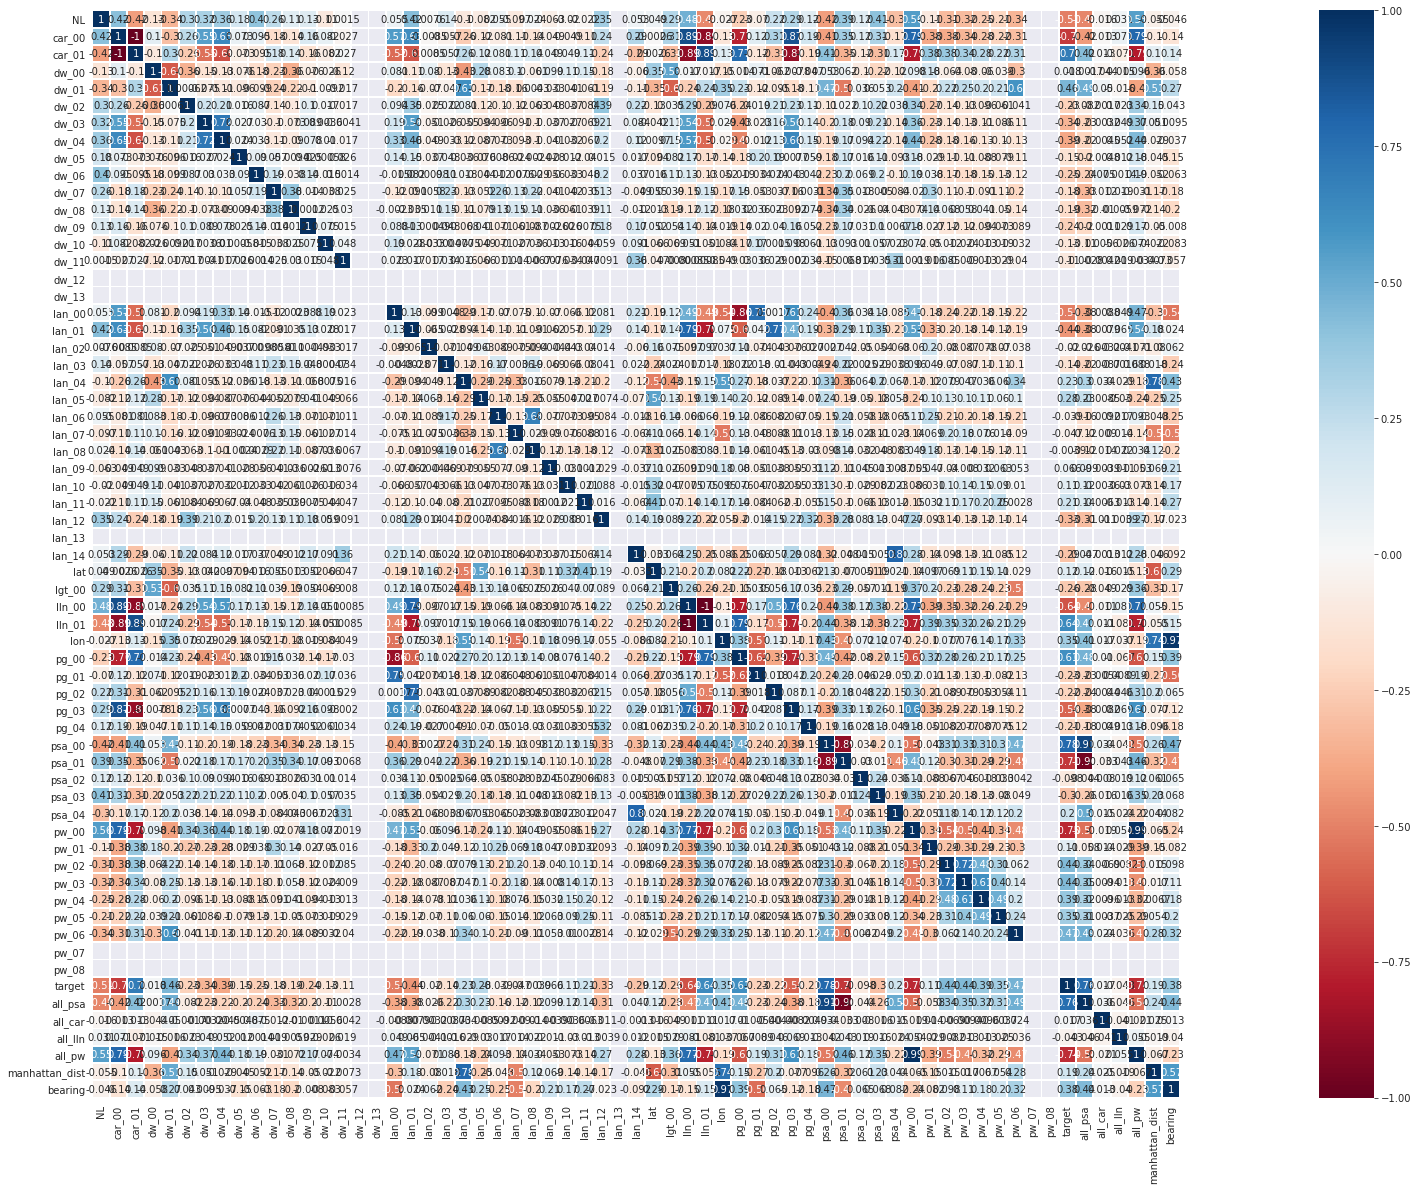

In [50]:
#correlelogram- plot heatmap to find correlation among features
corrmat =train.corr()
f, ax = plt.subplots(figsize=(50,20))
sns.heatmap(corrmat, square=True, annot=True,linewidth=0.8, cmap='RdBu')

In [51]:
new_df.head()

,NL,car_00,car_01,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,lat,lgt_00,lln_00,lln_01,lon,pg_00,pg_01,pg_02,pg_03,pg_04,psa_00,psa_01,psa_02,psa_03,psa_04,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,target,ward,all_psa,all_car,all_lln,all_pw,manhattan_dist,bearing
0,0.292039,0.273727,0.726273,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,0.008080,0.002823,0.001431,0.008224,0.0,0.0,0.832913,0.012336,0.001923,0.050939,0.000000,0.000564,0.076088,0.006371,0.003663,0.000375,0.000372,0.004943,0.002719,0.0,0.006793,-29.682270,0.919424,0.118825,0.881175,24.734743,0.357455,0.563166,0.004260,0.072996,0.002123,0.260191,0.607898,0.000188,0.010018,0.121705,0.742692,0.214027,0.019968,0.002848,0.007537,0.000000,0.012928,0.0,0.0,16.773757,41601001: Ward 1,0.381896,1.0,1.0,0.750229,54.417013,-132.671575
1,3.207775,0.144638,0.855362,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,0.151910,0.001486,0.001253,0.008010,0.0,0.0,0.879655,0.008445,0.000328,0.011249,0.000842,0.001759,0.032431,0.030844,0.001646,0.001308,0.000994,0.000000,0.002439,0.0,0.028061,-29.119311,0.959259,0.066903,0.933097,24.757737,0.698428,0.278006,0.003695,0.015835,0.004036,0.290228,0.549788,0.000000,0.021336,0.138647,0.309294,0.576844,0.018946,0.014566,0.057127,0.019092,0.004131,0.0,0.0,21.496661,41601002: Ward 2,0.428876,1.0,1.0,0.366421,53.877049,-132.618684
2,0.000000,0.272220,0.727780,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,0.129902,0.000000,0.000000,0.004150,0.0,0.0,0.565546,0.015991,0.001566,0.111270,0.004795,0.002552,0.148083,0.139687,0.003165,0.000165,0.000779,0.001692,0.002509,0.0,0.002200,-29.142276,0.826164,0.100009,0.899991,25.094093,0.672452,0.154225,0.002181,0.167494,0.003649,0.186435,0.677005,0.000489,0.021315,0.114757,0.323393,0.483376,0.083010,0.057560,0.010358,0.001421,0.040881,0.0,0.0,10.931425,41601003: Ward 3,0.301192,1.0,1.0,0.333751,54.236370,-132.516898
3,2.038778,0.127875,0.872125,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,0.218786,0.000000,0.000000,0.002947,0.0,0.0,0.743812,0.006530,0.001188,0.086423,0.006735,0.002308,0.103244,0.038284,0.003080,0.000582,0.000000,0.000197,0.007442,0.0,0.000174,-29.372052,0.986151,0.029155,0.970845,24.942867,0.728014,0.263831,0.001806,0.000956,0.005393,0.281229,0.593281,0.000579,0.007249,0.117663,0.677437,0.314194,0.002689,0.000000,0.000669,0.000000,0.005011,0.0,0.0,23.119257,41601004: Ward 4,0.398891,1.0,1.0,0.678106,54.314918,-132.582652
4,0.000000,0.404507,0.595493,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,0.015382,0.008693,0.000000,0.000673,0.0,0.0,0.422623,0.014352,0.000842,0.121869,0.007027,0.002613,0.147363,0.081706,0.003044,0.000169,0.000643,0.001201,0.004276,0.0,0.192272,-29.409381,0.957376,0.133552,0.866448,25.290165,0.753491,0.129654,0.004523,0.106953,0.005380,0.196687,0.517578,0.000989,0.005148,0.279598,0.771106,0.194743,0.009699,0.004859,0.001290,0.000673,0.017629,0.0,0.0,13.652252,41601005: Ward 5,0.476285,1.0,1.0,0.772397,54.699547,-132.477911


In [52]:
new_df.head()

,NL,car_00,car_01,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,lat,lgt_00,lln_00,lln_01,lon,pg_00,pg_01,pg_02,pg_03,pg_04,psa_00,psa_01,psa_02,psa_03,psa_04,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,target,ward,all_psa,all_car,all_lln,all_pw,manhattan_dist,bearing
0,0.292039,0.273727,0.726273,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,0.008080,0.002823,0.001431,0.008224,0.0,0.0,0.832913,0.012336,0.001923,0.050939,0.000000,0.000564,0.076088,0.006371,0.003663,0.000375,0.000372,0.004943,0.002719,0.0,0.006793,-29.682270,0.919424,0.118825,0.881175,24.734743,0.357455,0.563166,0.004260,0.072996,0.002123,0.260191,0.607898,0.000188,0.010018,0.121705,0.742692,0.214027,0.019968,0.002848,0.007537,0.000000,0.012928,0.0,0.0,16.773757,41601001: Ward 1,0.381896,1.0,1.0,0.750229,54.417013,-132.671575
1,3.207775,0.144638,0.855362,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,0.151910,0.001486,0.001253,0.008010,0.0,0.0,0.879655,0.008445,0.000328,0.011249,0.000842,0.001759,0.032431,0.030844,0.001646,0.001308,0.000994,0.000000,0.002439,0.0,0.028061,-29.119311,0.959259,0.066903,0.933097,24.757737,0.698428,0.278006,0.003695,0.015835,0.004036,0.290228,0.549788,0.000000,0.021336,0.138647,0.309294,0.576844,0.018946,0.014566,0.057127,0.019092,0.004131,0.0,0.0,21.496661,41601002: Ward 2,0.428876,1.0,1.0,0.366421,53.877049,-132.618684
2,0.000000,0.272220,0.727780,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,0.129902,0.000000,0.000000,0.004150,0.0,0.0,0.565546,0.015991,0.001566,0.111270,0.004795,0.002552,0.148083,0.139687,0.003165,0.000165,0.000779,0.001692,0.002509,0.0,0.002200,-29.142276,0.826164,0.100009,0.899991,25.094093,0.672452,0.154225,0.002181,0.167494,0.003649,0.186435,0.677005,0.000489,0.021315,0.114757,0.323393,0.483376,0.083010,0.057560,0.010358,0.001421,0.040881,0.0,0.0,10.931425,41601003: Ward 3,0.301192,1.0,1.0,0.333751,54.236370,-132.516898
3,2.038778,0.127875,0.872125,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,0.218786,0.000000,0.000000,0.002947,0.0,0.0,0.743812,0.006530,0.001188,0.086423,0.006735,0.002308,0.103244,0.038284,0.003080,0.000582,0.000000,0.000197,0.007442,0.0,0.000174,-29.372052,0.986151,0.029155,0.970845,24.942867,0.728014,0.263831,0.001806,0.000956,0.005393,0.281229,0.593281,0.000579,0.007249,0.117663,0.677437,0.314194,0.002689,0.000000,0.000669,0.000000,0.005011,0.0,0.0,23.119257,41601004: Ward 4,0.398891,1.0,1.0,0.678106,54.314918,-132.582652
4,0.000000,0.404507,0.595493,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,0.015382,0.008693,0.000000,0.000673,0.0,0.0,0.422623,0.014352,0.000842,0.121869,0.007027,0.002613,0.147363,0.081706,0.003044,0.000169,0.000643,0.001201,0.004276,0.0,0.192272,-29.409381,0.957376,0.133552,0.866448,25.290165,0.753491,0.129654,0.004523,0.106953,0.005380,0.196687,0.517578,0.000989,0.005148,0.279598,0.771106,0.194743,0.009699,0.004859,0.001290,0.000673,0.017629,0.0,0.0,13.652252,41601005: Ward 5,0.476285,1.0,1.0,0.772397,54.699547,-132.477911


In [0]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#new_df= scaler.fit(new_df)

In [0]:
target= Wonx_train["target"]
train =train.drop(["ward", "target"], axis=1)
test_id = Wonx_Sample["ward"]
test= test.drop(["ward" ], axis=1)

In [0]:
X = train
y= target

In [0]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X,y= scaler.fit(X,y)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, random_state=1234)

In [0]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [0]:
from catboost import CatBoostRegressor
model=CatBoostRegressor(iterations=800, #leaf_estimation_iterations=10,#800
                              learning_rate=0.1,
                              depth=4,#loss_function='MultiClass',#,scale_pos_weight=200,
                             #l2_leaf_reg=5,
                             bootstrap_type='Bernoulli',
                              subsample=0.9,
                              eval_metric='RMSE',
                                random_seed=4,
                              metric_period=20,
                                   #class_weight s=0,
                              #od_type='Iter',
                              #od_wait=45,
                              
                              allow_writing_files=False)

In [61]:
model.fit(X_train, y_train, cat_features=categorical_features_indices, eval_set=(X_val, y_val))

0:	learn: 9.6441290	test: 9.5203429	best: 9.5203429 (0)	total: 53.4ms	remaining: 42.7s
20:	learn: 4.4520351	test: 4.4340344	best: 4.4340344 (20)	total: 173ms	remaining: 6.43s
40:	learn: 3.7990600	test: 3.8541309	best: 3.8541309 (40)	total: 296ms	remaining: 5.48s
60:	learn: 3.5536578	test: 3.6860132	best: 3.6860132 (60)	total: 415ms	remaining: 5.03s
80:	learn: 3.3666421	test: 3.5816237	best: 3.5816237 (80)	total: 539ms	remaining: 4.78s
100:	learn: 3.1786932	test: 3.5001805	best: 3.5001805 (100)	total: 658ms	remaining: 4.55s
120:	learn: 2.9977751	test: 3.4320958	best: 3.4320958 (120)	total: 780ms	remaining: 4.38s
140:	learn: 2.8587953	test: 3.3822874	best: 3.3822874 (140)	total: 897ms	remaining: 4.19s
160:	learn: 2.7209813	test: 3.3477390	best: 3.3477390 (160)	total: 1.02s	remaining: 4.04s
180:	learn: 2.6017073	test: 3.3241161	best: 3.3241161 (180)	total: 1.14s	remaining: 3.9s
200:	learn: 2.4900664	test: 3.2931398	best: 3.2931398 (200)	total: 1.26s	remaining: 3.77s
220:	learn: 2.3912082	

In [0]:
pred = model.predict(test)

In [63]:
pred

array([18.73739244, 11.1004006 , 19.77306576, ..., 16.20577905, 12.52999574, 16.29166334])

In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
errcb=[]
y_pred_totcb=[]
from sklearn.model_selection import KFold,StratifiedKFold, TimeSeriesSplit
fold=KFold(n_splits=5)
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m=CatBoostRegressor(n_estimators=800,eval_metric='RMSE', max_depth=4,learning_rate=0.1,#reg_lambda=5,#5
                              subsample=0.9,bootstrap_type='Bernoulli',#leaf_estimation_iterations=10,
                    #l2_leaf_reg=5,#bagging_temperature=0.85,random_strength=100,
                     use_best_model=True)
    #CatBoostClassifier(n_estimators=1000,eval_metric='AUC',max_depth=5,learning_rate=0.1,reg_lambda=5,#5
                              #subsample=0.9,bootstrap_type='Bernoulli',
                    #l2_leaf_reg=5,#bagging_temperature=0.85,random_strength=100,
                     #use_best_model=True)
    m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100,verbose=100)
    preds=m.predict(X_test)
    print("err: ",np.sqrt(mean_squared_error(y_test,preds)))
    errcb.append(sqrt(mean_squared_error(y_test,preds)))
    p = m.predict(test)
    y_pred_totcb.append(p)

0:	learn: 9.7345625	test: 9.7345625	test1: 9.2359323	best: 9.2359323 (0)	total: 6.48ms	remaining: 5.18s
100:	learn: 3.1914214	test: 3.1914214	test1: 3.7106326	best: 3.7102890 (99)	total: 665ms	remaining: 4.6s
200:	learn: 2.5967415	test: 2.5967415	test1: 3.5281339	best: 3.5272822 (192)	total: 1.3s	remaining: 3.88s
300:	learn: 2.2015155	test: 2.2015155	test1: 3.4606957	best: 3.4588746 (291)	total: 1.93s	remaining: 3.2s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 3.458874604
bestIteration = 291

Shrink model to first 292 iterations.
err:  3.4588745893199038
0:	learn: 9.4600135	test: 9.4600135	test1: 10.0488744	best: 10.0488744 (0)	total: 6.52ms	remaining: 5.21s
100:	learn: 3.1357757	test: 3.1357757	test1: 3.4927517	best: 3.4927517 (100)	total: 637ms	remaining: 4.41s
200:	learn: 2.4974755	test: 2.4974755	test1: 3.4682475	best: 3.4432119 (120)	total: 1.26s	remaining: 3.76s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 3.443211904
bestIteration = 1

In [66]:
np.mean(errcb)

3.8760146243620843

In [67]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
errcb1=[]
y_pred_totcb1=[]
from sklearn.model_selection import KFold,StratifiedKFold, TimeSeriesSplit
fold=KFold(n_splits=5)
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m1=CatBoostRegressor(n_estimators=1500,eval_metric='RMSE',max_depth=4,learning_rate=0.1,od_wait=50, reg_lambda=3,
                              bootstrap_type='Bayesian',
                     use_best_model=True)
    m1.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100,verbose=100)
    preds=m1.predict(X_test)
    print("err: ",sqrt(mean_squared_error(y_test,preds)))
    errcb1.append(sqrt(mean_squared_error(y_test,preds)))
    p1 = m1.predict(test)
    y_pred_totcb1.append(p1)

0:	learn: 9.7711313	test: 9.7711313	test1: 9.2302591	best: 9.2302591 (0)	total: 6.98ms	remaining: 10.5s
100:	learn: 3.2980579	test: 3.2980579	test1: 4.1583804	best: 4.1583804 (100)	total: 661ms	remaining: 9.15s
200:	learn: 2.7560564	test: 2.7560564	test1: 3.9915607	best: 3.9915607 (200)	total: 1.34s	remaining: 8.63s
300:	learn: 2.4306038	test: 2.4306038	test1: 3.9605763	best: 3.9300527 (220)	total: 1.99s	remaining: 7.91s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 3.930052708
bestIteration = 220

Shrink model to first 221 iterations.
err:  3.930052675107313
0:	learn: 9.4691968	test: 9.4691968	test1: 10.0590158	best: 10.0590158 (0)	total: 7.09ms	remaining: 10.6s
100:	learn: 3.2514292	test: 3.2514292	test1: 3.5131855	best: 3.5131855 (100)	total: 649ms	remaining: 8.99s
200:	learn: 2.7177447	test: 2.7177447	test1: 3.3835408	best: 3.3776418 (199)	total: 1.28s	remaining: 8.27s
300:	learn: 2.3751546	test: 2.3751546	test1: 3.3937649	best: 3.3774549 (219)	total: 1.91s	rem

In [68]:
np.mean(errcb1)

3.9174382707337516

In [0]:
from xgboost import XGBRegressor

In [70]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
errcb2=[]
y_pred_totcb2=[]
from sklearn.model_selection import KFold,StratifiedKFold, TimeSeriesSplit
fold=KFold(n_splits=5)
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m2=XGBRegressor(max_depth=6, learning_rate=0.1, n_estimators=800, silent=True, bootstrap_type='Bernoulli', metrics='RMSE',colsample_bylevel=0.8, random_seed = 4, reg_alpha=0.8)
    m2.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100,verbose=100)
    preds=m2.predict(X_test)
    print("err: ",sqrt(mean_squared_error(y_test,preds)))
    errcb2.append(sqrt(mean_squared_error(y_test,preds)))
    p2 = m2.predict(test)
    y_pred_totcb2.append(p2)

[0]	validation_0-rmse:24.6024	validation_1-rmse:19.1536
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:1.03689	validation_1-rmse:3.60704
[200]	validation_0-rmse:0.450002	validation_1-rmse:3.61502
Stopping. Best iteration:
[124]	validation_0-rmse:0.845149	validation_1-rmse:3.5994

err:  3.5993939994000503
[0]	validation_0-rmse:23.7007	validation_1-rmse:23.1135
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:0.977856	validation_1-rmse:3.65267
[200]	validation_0-rmse:0.440654	validation_1-rmse:3.66278
Stopping. Best iteration:
[103]	validation_0-rmse:0.953487	validation_1-rmse:3.65049

err:  3.6504850135579643
[0]	validation_0-rmse:22.2817	validation_1-rmse:28.3181
Multiple eval metrics have been passed: 'validation_1-rm

In [71]:
np.mean(errcb2)

3.9957372882405835

In [0]:
from lightgbm import LGBMRegressor


In [73]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
errcb3=[]
y_pred_totcb3=[]
from sklearn.model_selection import KFold,StratifiedKFold, TimeSeriesSplit
fold=KFold(n_splits=5)
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m3=LGBMRegressor(max_depth=4, learning_rate=0.1, n_estimators=800, silent=True, metrics='RMSE', random_seed=4, bootstrap_type='Bernoulli',subsample=0.9, colsample_bylevel=0.8, reg_alpha=0.8)
    m3.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=400,verbose=100)
    preds=m3.predict(X_test)
    print("err: ",sqrt(mean_squared_error(y_test,preds)))
    errcb3.append(sqrt(mean_squared_error(y_test,preds)))
    p3 = m3.predict(test)
    y_pred_totcb3.append(p3)

Training until validation scores don't improve for 400 rounds.
[100]	training's rmse: 2.22979	valid_1's rmse: 3.75333
[200]	training's rmse: 1.62354	valid_1's rmse: 3.77599
[300]	training's rmse: 1.25894	valid_1's rmse: 3.76512
[400]	training's rmse: 0.993554	valid_1's rmse: 3.74772
Early stopping, best iteration is:
[76]	training's rmse: 2.42946	valid_1's rmse: 3.72686
err:  3.726862864477688
Training until validation scores don't improve for 400 rounds.
[100]	training's rmse: 2.20766	valid_1's rmse: 3.59178
[200]	training's rmse: 1.61091	valid_1's rmse: 3.61358
[300]	training's rmse: 1.23064	valid_1's rmse: 3.62828
[400]	training's rmse: 0.959519	valid_1's rmse: 3.63683
Early stopping, best iteration is:
[67]	training's rmse: 2.47515	valid_1's rmse: 3.57314
err:  3.573135050146852
Training until validation scores don't improve for 400 rounds.
[100]	training's rmse: 2.15089	valid_1's rmse: 4.6583
[200]	training's rmse: 1.55064	valid_1's rmse: 4.75394
[300]	training's rmse: 1.20629	val

In [74]:
np.mean(errcb3)

3.946229403631179

In [75]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
errcb4=[]
y_pred_totcb4=[]
from sklearn.model_selection import KFold,StratifiedKFold, TimeSeriesSplit
fold=KFold(n_splits=5)
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m4=AdaBoostRegressor(learning_rate=0.1, n_estimators=800, loss='linear', random_state=4)
    m4.fit(X_train,y_train)
    preds=m4.predict(X_test)
    print("err: ",sqrt(mean_squared_error(y_test,preds)))
    errcb4.append(sqrt(mean_squared_error(y_test,preds)))
    p4 = m4.predict(test)
    y_pred_totcb4.append(p4)

err:  4.612810901683374
err:  3.7086930866705785
err:  4.951195556224581
err:  4.659896161874598
err:  4.161474281997257


In [76]:
np.mean(errcb4)

4.418813997690078

In [0]:
#from mlxtend.regressor import StackingRegressor
#stregr = StackingRegressor(regressors=[m, m1, m2,m3], meta_regressor=m)

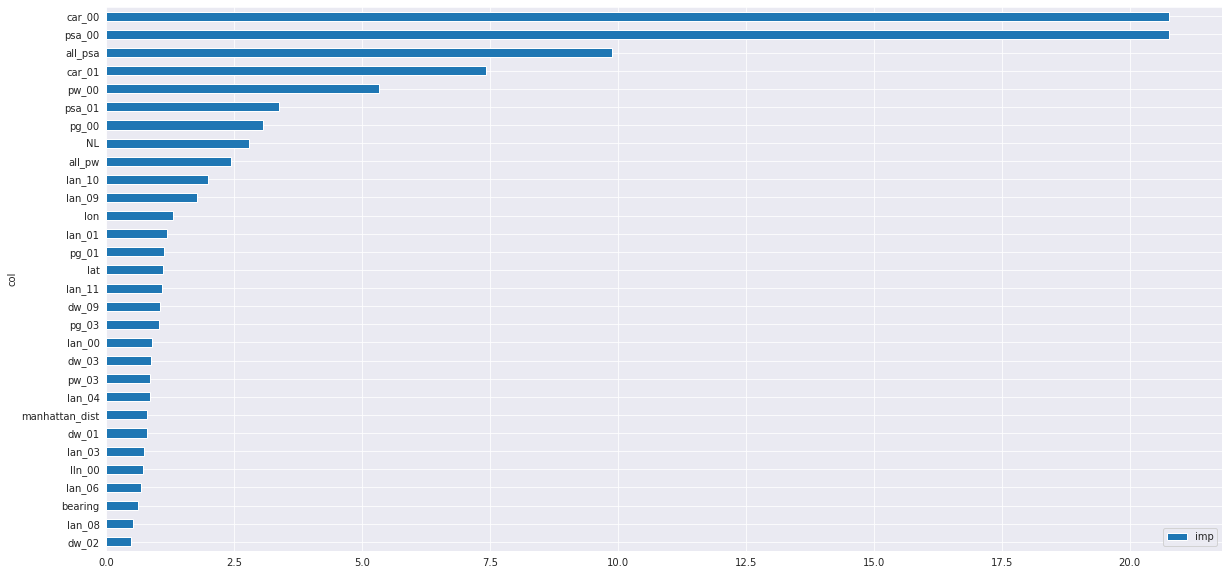

In [78]:
fea_imp = pd.DataFrame({'imp':m.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
plt.savefig('catboost_feature_importance.png')

In [0]:
d = {"ward": test_id, 'target': np.mean(y_pred_totcb, 0)}
test_predictions = pd.DataFrame(data=d)
test_predictions = test_predictions[["ward", 'target']]

In [0]:
#test_predictions.to_csv('in14.csv', index=False)
test_predictions.to_csv('re40.csv', index=False)

In [81]:
test_predictions.head()

,ward,target
0,21001001: Ward 1,19.523143
1,21001002: Ward 2,12.570903
2,21001003: Ward 3,21.617710
3,21001004: Ward 4,17.721102
4,21001005: Ward 5,21.315876


In [0]:
d = {"ward": test_id, 'target': np.mean(y_pred_totcb1, 0)}
test_predictioned = pd.DataFrame(data=d)
test_predictioned = test_predictioned[["ward", 'target']]

In [83]:
test_predictioned.head()

,ward,target
0,21001001: Ward 1,18.906061
1,21001002: Ward 2,13.281038
2,21001003: Ward 3,20.693021
3,21001004: Ward 4,17.622406
4,21001005: Ward 5,21.249114


In [0]:
test_predictioned.to_csv('re2.csv', index=False)

In [0]:
d = {"ward": test_id, 'target': np.mean(y_pred_totcb2, 0)}
test_prediction = pd.DataFrame(data=d)
test_prediction = test_prediction[["ward", 'target']]

In [86]:
test_prediction.head()

,ward,target
0,21001001: Ward 1,18.465755
1,21001002: Ward 2,14.172223
2,21001003: Ward 3,20.941196
3,21001004: Ward 4,16.688965
4,21001005: Ward 5,21.906773


In [0]:
test_prediction.to_csv('re3.csv', index=False)

In [0]:
d = {"ward": test_id, 'target': np.mean(y_pred_totcb3,0)}
test_prediction = pd.DataFrame(data=d)
test_predictio = test_prediction[["ward", 'target']]

In [0]:
test_predictio.to_csv('re7.csv', index=False)

In [0]:
d = {"ward": test_id, 'target': np.mean(y_pred_totcb4,0)}
test_prediction = pd.DataFrame(data=d)
test_predicti = test_prediction[["ward", 'target']]

In [0]:
test_predicti.to_csv('re8.csv', index=False)

In [0]:
h = pd.read_csv('re8.csv')

In [93]:
h.head()

,ward,target
0,21001001: Ward 1,17.304502
1,21001002: Ward 2,13.090349
2,21001003: Ward 3,20.399740
3,21001004: Ward 4,16.281874
4,21001005: Ward 5,20.486342


In [0]:
b = pd.read_csv('re2.csv')
c = pd.read_csv('re3.csv')
a = pd.read_csv('re40.csv')
d = pd.read_csv('re7.csv')
f= pd.read_csv('re40.csv')


In [95]:
a['target'].corr(b['target'])

0.9986239950833865

In [96]:
test_predictions['target'].corr(test_prediction['target'])

0.9898303172186701

In [0]:
test_predictions['target'] = (a['target'] * 0.70+ b['target'] * 0.30 ).round(2)

In [0]:
# Create Numpy arrays of train, test and target ( Survived) dataframes to feed into our models
#y_train = train['target'].ravel()
#train = train.drop(['target'], axis=1)
#x_train = train.values # Creates an array of the train data
#x_test = test.values # Creats an array of the test data

In [0]:
# Create 5 objects that represent our 4 models
#rf = SklearnHelper(y_pred_totcb)
#et = SklearnHelper(y_pred_totcb1)
#ada = SklearnHelper(y_pred_totcb2)
#gb = SklearnHelper(clf=GradientBoostingClassifier, seed=SEED, params=gb_params)
#svc = SklearnHelper(clf=SVC, seed=SEED, params=svc_params)

In [0]:
#from sklearn.model_selection import cross_val_score, Kfold

In [0]:
#print(mean_square_error(X_train, y_train))

In [0]:
#result =cross_val_score(m, X_train,y_train, cv=Kfold)

In [0]:
test_predictions.to_csv('res_stack4.csv', index=False)

In [0]:
# Fit a basic linear regression model, keeping the last 1000 rows for scoring
#from sklearn.linear_model import LinearRegression
#lm = LinearRegression()
#lm.fit(new_df[in_col][:-1000], test[:-1000])